#### Download/Install the Required Libraries

In [2]:
import sys
!{sys.executable} -m pip install -q --upgrade pip
!{sys.executable} -m pip install -q numpy pandas sklearn
!{sys.executable} -m pip install -q nltk spacy gensim wordcloud textblob contractions clean-text unidecode 

In [4]:
from platform import python_version
print(python_version())

3.10.9


# From Bayes' Theorum to Naive Bayes' Classifier

## Marginal Probability
- ***Probability*** defines the ***`likelihood of occurance of an event`*** 
- Defined as the ratio of the number of favourite outcomes to the total number of outcomes of an event
>-      P(Event) = (Number of favourite outcomes)/(Total outcomes)
- Marginal Probability is the probability of an event irrespective of all the other events
- The value of the probability of an event to happen can lie between 0 to 1 because the favourable number of outcomes can never cross the total number of outcomes
- When the probability of something approaches 1, then it means it is very likely, and when the probablity approaches to 0, then it means that it is very unlikely
- ***Independent Events***: Two events are said to independent, if the probability of occuring of one event has no impact on the probability of occuring of another event
- In order to compute the probability of two independent events, we use ***`Join Probability` (Common Area)***
>- P(A and B) = P(A) * P(B)
- ***Independent Events***: Two events are said to dependent happing one after another, if the probability of occuring of one event has impact on the probability of occuring of another event 
>- Dependent events and Conditional Probability
>- P(A|B) = P(A and B)/P(B)
>- P(B|A) = P(A and B)/P(A)
- In case of two independent events, 
>- P(A|B) = P(A and B)/P(B) = P(A) * P(B)/P(B) = P(A)

## From Conditional Probability to Bayes' Theorum
- It is a way of calculating conditional probability without the joint probability
>- P(A|B) = (P(A) * P(B|A))/P(B)
- P(A|B) is ***`Posterior Probability/Conditional Probability`***: Probability of an event that is calculated after all the information related to the event has been accounted for
- P(A) is ***`Prior Probability`***: Probability of an event that is calculated before considering the new information obtained
- P(B|A) is ***`Likelihood`***: Reverse of Posterior Probability
- P(B) is known as ***`Normalization Constant`***

# Naive Bayes' Classifier
- It is a probabilistic ML algorithm that uses Bayes' Theorum for supervised ML classifications. 
- This algorithm makes an assumptions that all the input features are ***`independent`*** to each other and make ***`Equal`*** contributions 
- These are the three types of Naive Bayes' Theorum under the Scikit-Learn Library
     1) ***Bernoulli Naive Bayes' (`BernoulliNB`)***: It is used when all the input features are binary such that they take only two values. Means 0's can represent "Word does not occur in the document" and 1's represent "Word occurs in the documents"
     2) ***Multinomial Naive Bayes' (`MultinomialNB`)***: It is used when all the input features are discrete having integer values. For example: frequency of occurrences of a term/word in the document. It is suitable for the classifications with discrete features (word counts for text classification). However, in practice, fractional counts such as tf-idf may also work
     3) ***Gaussian Naiva Bayes' (`GaussianNB`)***: It is used when the input features are continuous values (age, distance, inflation etc), whose probabilities can be modeled using a Gaussian/Normal Distribution. 
- The output labels can be
     1) ***Binary***: Assign observation to one of two groups (spam/ham, yes/no, healthy/sick, etc)
     2) ***Multinomial***: Assign observation to one to N-groups (happy, sad, fear, surprise, joy) 
     3) ***Ordinal***: Assign one of N-ordered groups (baby, child, adult, young, elder, old)
     4) ***Multiclass***: Assign obserrvation to K of N groups. Assign more than one label to an observation. (happy, baby), (sad, child), (angry, adult)

>-   P(y/ x1, x2, x3) = P(y) * P(x1/y) * P(x2/y) * P(x3/y) / P(x1) * P(x2) * P(x3)
- ***As denominator value remains same for all the labels, so we can remove it after replacing proportional sign with equal sign***
- After that equal will become
>-   P(y/ x1, x2, x3) ***`proportional to`*** argmax(P(y) * P(x1/y) * P(x2/y) * P(x3/y)) 

#### Example # 01

>-    P(y=yes | x1 = cloudy, x2 = cool, x3 = normal)  ***=***  P(y = yes) * P(y|x1) * P(y|x2) * P(y|x3)
>-    P(y=no | x1 = cloudy, x2 = cool, x3 = normal)  ***=***  P(y = no) * P(y|x1) * P(y|x2) * P(y|x3)
- ***IF probability value of yes is greater than no than it will rain on this day***

***Calculate the word count, conditional probabilities, and perform Laplace Smoothing***
>- frequency of a word in the document = freq(w,class)
>- Conditional Probability = P(w1 | class) = freq(w1,class)/N(total number of word in the class-->
+ve/-ve class)
- ***There may a word in the document with frequency in any class, to address this issue we use, laplace smoothing***
>- P(w1 | class) = (freq(w1,class) + 1)/(
N(total number of word class) + V(number of unique words in the vocabulary)
- ***Power Words: Words in the document that define the class of the document***
- ***Opposite words from power words are those words that have almost same probabilities in both the class, so they don't effect the model***

#### Load Downloaded dataset (`SMSSpanCollection`) in Pandas DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [36]:
df = pd.read_csv('datasets/SMSSpamCollection', sep = '\t', header = None, names = ['label','text'])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Text Preprocessing
#### a) Basic Preprocessing, Tokenization, Stopward Removal, and Stemming 

In [37]:
import re
import string
import contractions
from cleantext import clean
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
wn = WordNetLemmatizer()

def text_preprocessing(mystr):
    mystr = mystr.lower()                                                # Case Folding
    mystr = re.sub('\w*\d\w*', '', mystr)                                # Remove digits
    mystr = re.sub('\n', ' ', mystr)                                      # Remove new line characters with space
    mystr = re.sub('[''""....]', '', mystr)                              # Remove double quotes and single quotes
    mystr = re.sub('<.*?>', '', mystr)                                   # Remove HTML tags
    mystr = re.sub(r'\[.*?\]', '', mystr)                                # Remove text in the square brackets
    mystr = re.sub('https?://\S+|www.\.\S+','', mystr)                   # Remove URLs
    mystr = re.sub('\n', ' ', mystr)  
    mystr = clean(mystr, no_emoji=True)                                  # Remove emojis
    mystr = ''.join([i for i in mystr if i not in string.punctuation])   # Remove punctuations
    mystr = ' '.join([contractions.fix(i) for i in mystr.split()])        # Expand Contractions
    tokens = word_tokenize(mystr)                                        # Tokenize the string
    mystr = ''.join([i for i in mystr if i not in string.punctuation])
    tokens = [i for i in tokens if i not in stop_words]                  # Remove stop words
#     tokens = [ps.stem(i) for i in tokens]                              # Stemming
    tokens = [wn.lemmatize(i) for i in tokens]                           # Lemmatization
    new_str = ' '.join(tokens)
    return new_str

In [38]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df['text'][4].dtype

AttributeError: 'str' object has no attribute 'dtype'

In [41]:
df['ptext'] = df['text'].apply(lambda x: text_preprocessing(x))

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7597,7598,7599,7600,7601,7602,7603,7604,7605,7606
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Verification of Text Preprocessing

In [7]:
df['text'][20]

'Is that seriously how you spell his name?'

In [8]:
df['ptext'][20]

'seriously spell name'

#### Text Vectorization Using Bag of Words (BoW)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bow = cv.fit_transform(df['ptext'])

In [14]:
print(len(cv.vocabulary_))

7607


In [16]:
print(cv.get_feature_names_out())

['8ud' 'aa' 'aah' ... 'zoom' 'zouk' 'zyada']


In [17]:
bow.shape

(5572, 7607)

In [18]:
bow

<5572x7607 sparse matrix of type '<class 'numpy.int64'>'
	with 42346 stored elements in Compressed Sparse Row format>

>- The DTM contains 5572 rows as there are 5572 messages
>- The DTM contains 7607 columns as there are 7606 unique words in the vocabulary of messages 

In [19]:
# Since bow is a sparse matrix, so change it to dense matrix or array, we can use the numpt toarray() method
#bow.toarray()
bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Understand the Sparsity of the Resulting Document-Term-Matrix (DTM)

In [20]:
total_cells = bow.shape[0] * bow.shape[1]
total_cells

42386204

In [21]:
nonzero_cells = bow.nnz
nonzero_cells

42346

In [23]:
percentage = (nonzero_cells/total_cells)*100
percentage

0.09990514838271435

>- 99.9% cells contains a zero values
>- In order to save memory space and speed up algebric operations, we use sparse representation of matrix

### Check out and Understand BoW vector representation of a specific sms

In [25]:
print(df.text[9])
print('\n', df['ptext'][9])
print('\n', df['label'][9])

Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030

 mobile month r entitled update latest colour mobile camera free call mobile update co free

 spam


In [27]:
bow[9].nnz

10

In [28]:
print(bow[9])

  (0, 2396)	2
  (0, 914)	1
  (0, 4116)	3
  (0, 4147)	1
  (0, 2007)	1
  (0, 6957)	2
  (0, 3583)	1
  (0, 1229)	1
  (0, 936)	1
  (0, 1197)	1


### View the Document Term Matrix in Pandas DataFrame

In [29]:
import pandas as pd
df = pd.DataFrame(data = bow.todense())
df

,0,1,2,3,4,5,6,7,8,9,...,7597,7598,7599,7600,7601,7602,7603,7604,7605,7606
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building (Feed Training Data to ML Model)
#### Choose ML Model
- We can use one of the following ML Model
>- 1) Naive Bayes
>- 2) Logistic Regression
>- 3) Support Vector Machine
>- 4) K-Nearest Neighbours
>- 5) Decision Tree Classifier
>- 6) Random Forest Classifier
>- 7) XGBoost Classifier
>- 8) AdaBoost Classifier

### Naive Bayes' Classifier
- It is a probabilistic ML algorithm that uses Bayes' Theorum for supervised ML classifications. 
- This algorithm makes an assumptions that all the input features are ***`independent`*** to each other and make ***`Equal`*** contributions 
- These are the three types of Naive Bayes' Theorum under the Scikit-Learn Library
     1) ***Bernoulli Naive Bayes' (`BernoulliNB`)***: It is used when all the input features are binary such that they take only two values. Means 0's can represent "Word does not occur in the document" and 1's represent "Word occurs in the documents"
     2) ***Multinomial Naive Bayes' (`MultinomialNB`)***: It is used when all the input features are discrete having integer values. For example: frequency of occurrences of a term/word in the document. It is suitable for the classifications with discrete features (word counts for text classification). However, in practice, fractional counts such as tf-idf may also work
     3) ***Gaussian Naiva Bayes' (`GaussianNB`)***: It is used when the input features are continuous values (age, distance, inflation etc), whose probabilities can be modeled using a Gaussian/Normal Distribution. 
- The output labels can be
     1) ***Binary***: Assign observation to one of two groups (spam/ham, yes/no, healthy/sick, etc)
     2) ***Multinomial***: Assign observation to one to N-groups (happy, sad, fear, surprise, joy) 
     3) ***Ordinal***: Assign one of N-ordered groups (baby, child, adult, young, elder, old)
     4) ***Multiclass***: Assign obserrvation to K of N groups. Assign more than one label to an observation. (happy, baby), (sad, child), (angry, adult)

## Split Data for Training and Testing

In [30]:
X = bow
X

<5572x7607 sparse matrix of type '<class 'numpy.int64'>'
	with 42346 stored elements in Compressed Sparse Row format>

In [42]:
# Since our output label can belong to two classes ham or spam so we need to vectorize to that columns to zero and one
# This can be done using one-hot encoding
y = df['label']
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5, shuffle = True)


In [44]:
print('Size of the Training Input Data:', X_train.shape)
print('\n Size of the Test Input Data: ', X_test.shape)
print('Size of the Training Label Data:', y_train.shape)
print('\n Size of the Test label Data: ', y_test.shape)

Size of the Training Input Data: (3900, 7607)

 Size of the Test Input Data:  (1672, 7607)
Size of the Training Label Data: (3900,)

 Size of the Test label Data:  (1672,)


## Fit Naive-Bayes' Classifier Model on Training Data

In [62]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [65]:
model.fit(X_train, y_train)

MultinomialNB()

>- A ML model training model training actually creates a mathematical representation relationship between the input features and output labels

## Evaluate Metrics for Classification ML Model 
### 1) Confusion Matrix

In [47]:
predictions = model.predict(X_test)
predictions

array(['spam', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [49]:
y_test

2095    spam
5343     ham
564     spam
3849     ham
3317     ham
        ... 
4569     ham
3714     ham
1885     ham
5313     ham
1922     ham
Name: label, Length: 1672, dtype: object

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm
# Since there are two classes ham and spam in the label, so 2*2 matrix, if n-classes then n*n matrix

array([[1410,   39],
       [  13,  210]], dtype=int64)

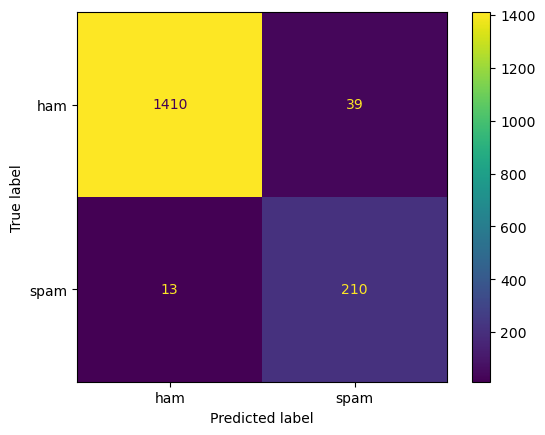

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
cmd.plot()

### 2) Accuracy
- Accuracy actually answers the question: ***How often is the model correct***
>- Accuracy = (Count of Correct Answers of the Classifier)/(Count of all the Questions asked from Classifier)
>- Accuracy = (TN + TP)/(TN + TP + FP + FN)
>- Accuracy = (1410 + 210)/(1410 + 210 + 13 + 39)
>- Accuracy is an evaluation metric used for classification algorithms that tells us what fraction of time the classifier are correct in the classification

In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))
print(accuracy_score(y_test, predictions, normalize = False))

0.9688995215311005
1620


### 3) The Accuracy Paradox
- Accuracy does not prove to be a good evaluation metric in case of imbalance data sets; which are very common in the real word scenarios
- So, a classifier that always predicts the majority class, in highly imbalanced dataset, will always have a high accurcay score
- Therefore, accuracy is not a good evaluation metrics, when the goal is to discover the rare events
- ***Conclusion***: We should not rely solely on Accuracy as a metric. This is where precision, recall and F1 score comes in

### 4) Precision
- Precision actually answers the question: ***When prediction is positive, how often it matches with the ground positives***
>-   Precision = True Positives/Predicted Positives = TP / (TP + FP)
- If we consider `ham` label as positive,
>-   Precision = 1410 /(1410 + 13) = 0.9908
- If we consider `span` label as positive
>-   Precision = 210 / (210 + 39) = 0.8433

In [55]:
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions, pos_label = 'ham'))
print(precision_score(y_test, predictions, pos_label = 'spam'))

0.9908643710470836
0.8433734939759037


### 5) Recall (Sensitivity)
- Recall actually answers the question: ***When ground reality is positive, how often it is correct***
>-   Recall = True Positives/Real Positives = TP / (TP + FN)
- If we consider `ham` label as positive,
>-   Precision = 1410 /(1410 + 39) = 0.9730
- If we consider `span` label as positive
>-   Precision = 210 / (210 + 13) = 0.9417
- If recall is high, that means the classifier is good in identifying real patients

In [57]:
from sklearn.metrics import recall_score
print(recall_score(y_test, predictions, pos_label = 'spam'))
print(recall_score(y_test, predictions, pos_label = 'ham'))

0.9417040358744395
0.9730848861283644


### 6) F-1 Score
- Precision and accuracy alone do not solve the Accuracy Paradox. So, we combine both these metrics to create a new metric called F-1 Score, which is the harmonic mean of the precision and recall
- We use harmonic mean instead of arithmetic mean because harmonic mean punishes the outliers more. In other words, the harmonic means goes to zero if either of recall and precision ends up being zero
>- F1_score = (inv(inv(P) + inv(R)))/2
>- F1_Score = (2PR/(P+R))
- F1_Score will be high if both precision and recall are high
- F1_Score will be low if either of precision and recall is low

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1449
        spam       0.84      0.94      0.89       223

    accuracy                           0.97      1672
   macro avg       0.92      0.96      0.94      1672
weighted avg       0.97      0.97      0.97      1672

